### Building Classification Models

SVM, KNN and RF models will be built and compared to get the best model using the dataset with best descriptors. The relative importance of each descriptor will be generated using RF_featureimportance.

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, matthews_corrcoef
import seaborn as sns

In [2]:
df = pd.read_csv("data_best.csv")

In [3]:
df.head()

,MinEStateIndex,MinAbsEStateIndex,qed,FpDensityMorgan3,BCUT2D_MWLOW,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRLOW,BalabanJ,BertzCT,...,fr_imide,fr_methoxy,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfonamd,fr_sulfone,fr_thiophene,y
0,-0.929926,0.000172,0.715404,2.482759,10.092103,2.504927,-2.436480,-0.120704,1.482119,1098.620517,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-4.397878,0.005121,0.656845,2.370370,9.922879,2.406043,-2.570896,-0.137298,1.576133,759.355620,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-4.749727,0.252888,0.715099,2.413793,9.818650,2.292612,-2.316165,-0.274197,1.528090,859.084358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.952027,0.100630,0.441669,2.500000,9.933778,2.358864,-2.461242,-0.133255,1.637049,1210.896799,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-3.992580,0.000307,0.361576,2.520000,9.934507,2.354589,-2.461013,-0.133255,2.097181,911.867473,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Support Vector Machine Model

In [4]:
def build_model(ds):
    X = ds.drop("y",axis=1)
    y = ds["y"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    
    s = StandardScaler()
    X_train = pd.DataFrame(s.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(s.transform(X_test),columns=X_test.columns)
    
    svm = SVC(kernel="linear",random_state=42)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)
    return acc, precision, recall, mcc


In [5]:
build_model(df)

(0.9052631578947369,
 0.9384615384615385,
 0.9242424242424242,
 0.7790193182780569)

### KNearest Neighbour

In [6]:
def build_KNN(ds):
    X = ds.drop("y",axis=1)
    y = ds["y"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    
    s = StandardScaler()
    X_train = pd.DataFrame(s.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(s.transform(X_test),columns=X_test.columns)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)
    return acc, precision, recall, mcc

In [7]:
build_KNN(df)

(0.9157894736842105,
 0.9264705882352942,
 0.9545454545454546,
 0.7985727659491166)

### RandomForest 

In [13]:
def build_RF(ds):
    X = ds.drop("y",axis=1)
    y = ds["y"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
    
    s = StandardScaler()
    X_train = pd.DataFrame(s.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(s.transform(X_test),columns=X_test.columns)
    
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train,y_train)
    feat_imp = rf.feature_importances_
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)
    return acc, precision, recall, mcc,feat_imp

In [15]:
rf_results =build_RF(df)

In [16]:
rf_results

(0.9263157894736842,
 0.9402985074626866,
 0.9545454545454546,
 0.8248435719625181,
 array([3.60989308e-02, 2.11623415e-02, 1.08090829e-02, 3.48674936e-02,
        6.15752293e-02, 2.04386225e-02, 9.95256735e-02, 8.69353688e-02,
        1.90380295e-02, 5.34501563e-02, 2.22060656e-02, 3.51726356e-03,
        1.43014251e-02, 4.05068980e-03, 6.24316268e-03, 1.18990651e-02,
        1.08243934e-02, 4.25473901e-03, 1.90795966e-02, 7.30741140e-03,
        9.61857929e-03, 1.87923512e-03, 2.77617695e-03, 4.75724711e-02,
        4.36557773e-02, 6.35969472e-03, 6.70086686e-03, 1.03550133e-02,
        7.20074155e-02, 8.99630903e-03, 1.49847216e-02, 1.32136635e-02,
        2.73041716e-02, 8.61265500e-03, 3.54812988e-02, 1.06362320e-03,
        4.23453679e-03, 1.41326204e-03, 5.36869489e-03, 2.41084817e-03,
        2.80515347e-04, 6.65858857e-04, 4.26128308e-02, 3.34689677e-03,
        2.61545322e-03, 4.27740337e-03, 3.57418399e-04, 1.41910327e-03,
        1.42728511e-03, 2.19557409e-05, 1.18593544e-

**RandomForest Classifier shows better performance than SVM and KNN**

In [17]:
feat_imp = rf_results[4]

In [28]:
feat_imp = pd.Series(feat_imp,index=df.drop("y",axis=1).columns)
feat_imp

MinEStateIndex              0.036099
MinAbsEStateIndex           0.021162
qed                         0.010809
FpDensityMorgan3            0.034867
BCUT2D_MWLOW                0.061575
BCUT2D_LOGPHI               0.020439
BCUT2D_LOGPLOW              0.099526
BCUT2D_MRLOW                0.086935
BalabanJ                    0.019038
BertzCT                     0.053450
HallKierAlpha               0.022206
PEOE_VSA11                  0.003517
PEOE_VSA12                  0.014301
PEOE_VSA14                  0.004051
PEOE_VSA3                   0.006243
PEOE_VSA6                   0.011899
PEOE_VSA8                   0.010824
SMR_VSA4                    0.004255
SMR_VSA5                    0.019080
SMR_VSA6                    0.007307
SlogP_VSA1                  0.009619
SlogP_VSA11                 0.001879
SlogP_VSA4                  0.002776
EState_VSA1                 0.047572
EState_VSA10                0.043656
EState_VSA3                 0.006360
EState_VSA6                 0.006701
E

In [29]:
feat_imp = feat_imp.sort_values(ascending=False)

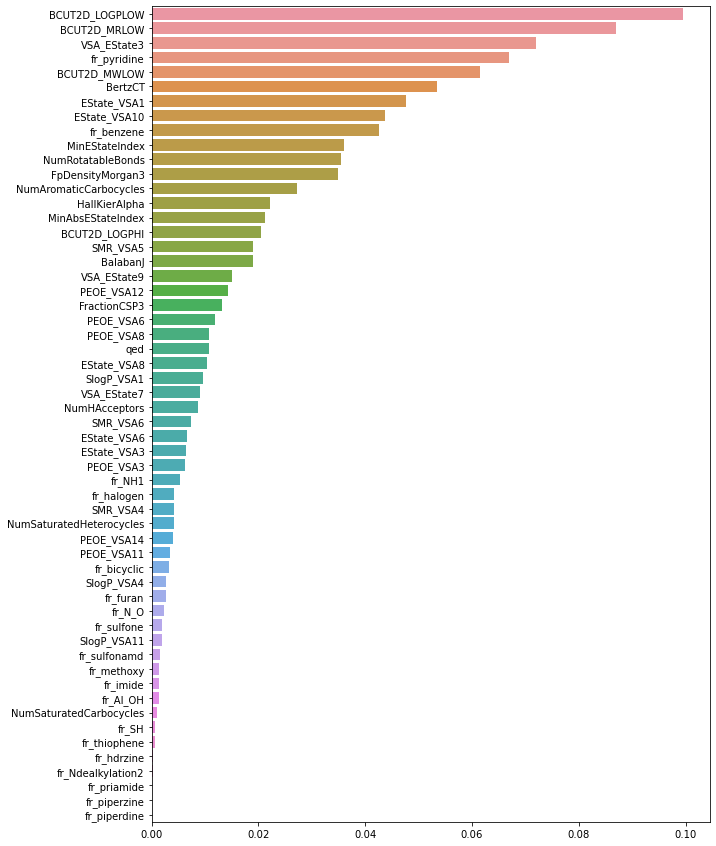

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,15))
sns.barplot(x=feat_imp.values,y=feat_imp.index)

plt.show()